In [11]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils


In [12]:



def convolve_im_spatial(im: np.array,
                kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the spatial kernel (kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution
        
        Note: kernel can be of different shape than im.

    Args:
        im: np.array of shape [H, W]
        kernel: np.array of shape [K, K] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    orig_im = im.copy()
    orig_shape = im.shape
    
    # Step 1: Compute the FFT of the image
    im_fft = np.fft.fft2(im)
    im_fft_shifted = np.fft.fftshift(im_fft)

    # Step 2: Pad the kernel to the size of the image
    pad_height = orig_shape[0] - kernel.shape[0]
    pad_width = orig_shape[1] - kernel.shape[1]
    kernel_padded = np.pad(kernel, ((0, pad_height), (0, pad_width)), 'constant')

    # Step 3: Compute the FFT of the padded kernel
    kernel_fft = np.fft.fft2(kernel_padded)
    kernel_fft_shifted = np.fft.fftshift(kernel_fft)

    # Step 4: Apply the convolution theorem by multiplying in the frequency domain
    filtered_fft = im_fft_shifted * kernel_fft_shifted

    # Step 5: Inverse FFT to get the filtered image in spatial domain
    filtered_fft_shifted_back = np.fft.ifftshift(filtered_fft)
    im_filtered = np.fft.ifft2(filtered_fft_shifted_back)
    conv_result = np.real(im_filtered)
    

    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))
        plt.subplot(1, 5, 1)
        plt.imshow((orig_im.astype('float')), cmap="gray")
        plt.title("Original Image")
        
        plt.subplot(1, 5, 2) 
        # Visualize FFT
        plt.title("FFT Image")
        
        plt.subplot(1, 5, 3)
        # Visualize FFT kernel
        plt.title("FFT Kernel")
        
        plt.subplot(1, 5, 4)
        # Visualize filtered FFT image
        plt.title("Filtered FFT Image")
        
        plt.subplot(1, 5, 5) 
        # Visualize filtered spatial image
        plt.imshow(conv_result, cmap="gray")
        plt.title("Filtered Spatial Image")

    ### END YOUR CODE HERE ###
    return conv_result

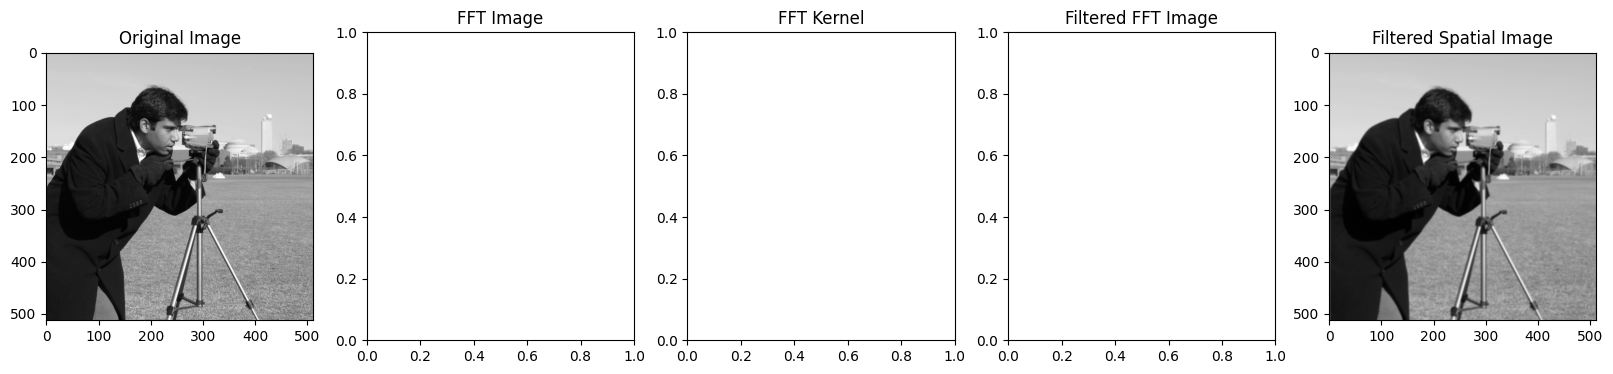

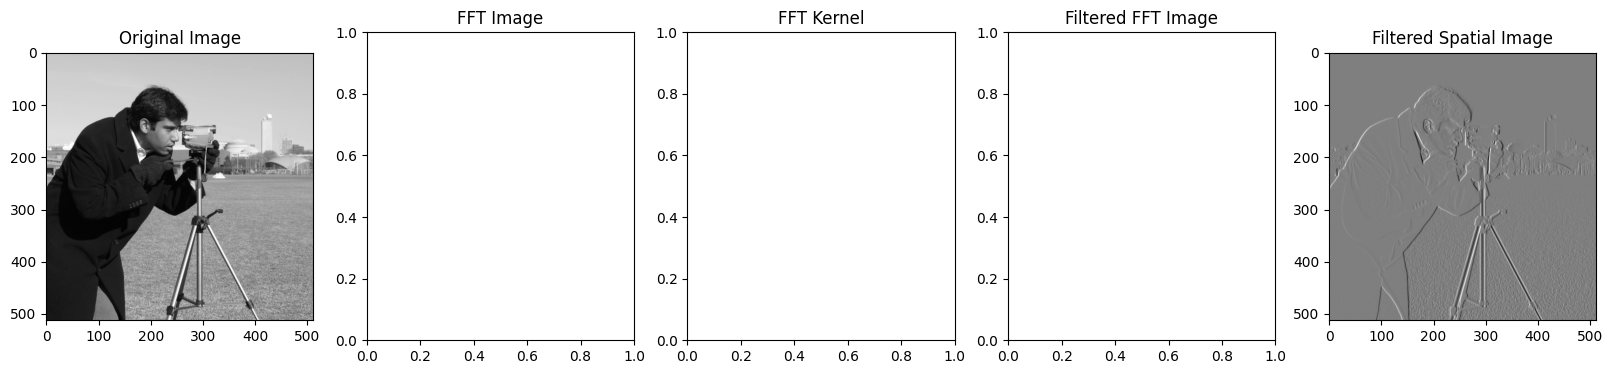

Saving image to: image_processed/camera_gaussian.png
Saving image to: image_processed/camera_sobelx.png


In [13]:
if __name__ == "__main__":
    verbose = True  # change if you want

    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)

    # DO NOT CHANGE
    gaussian_kernel = np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1],
    ]) / 256
    image_gaussian = convolve_im_spatial(im, gaussian_kernel, verbose)

    # DO NOT CHANGE
    sobel_horizontal = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    image_sobelx = convolve_im_spatial(im, sobel_horizontal, verbose)

    if verbose:
        plt.show()

    utils.save_im("camera_gaussian.png", image_gaussian)
    utils.save_im("camera_sobelx.png", image_sobelx)